## Final Project Submission

Please fill out:
* Student name: Amani Wanene
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


1. Import relevant resources

In [2846]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


2. Import the datasets.

In [2847]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz',encoding = 'latin1')
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = '\t',encoding = 'latin1')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [2848]:


import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB


In [2849]:
imdb_conn = sqlite3.connect('zippedData/im.db')


In [2850]:
imdb_df = pd.read_sql("""SELECT * FROM movie_basics
 JOIN movie_ratings
USING(movie_id)
""",imdb_conn)

3.View the datasets

In [2851]:
print(bom_df.shape)
bom_df.isna().sum()




(3387, 5)


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [2852]:
print(movie_info_df.shape)
movie_info_df.isna().sum()

(1560, 12)


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [2853]:
print(reviews_df.shape)
reviews_df.isna().sum()

(54432, 8)


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [2854]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [2855]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [2856]:
print(imdb_df.shape)
imdb_df.isna().sum()

(73856, 8)


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

4. Clean Data

A) bom_df

In [2857]:
#drop rows with missing domestic_gross
bom_df = bom_df.dropna(subset=['domestic_gross'])

print(bom_df.loc[bom_df['domestic_gross'].isna()])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [2858]:
#check percentage of foreign_gross missing values
bom_df['foreign_gross'].isna().sum()
missing_values_count = len(bom_df[bom_df['foreign_gross'].isna()])
total_rows = len(bom_df)

proportion_missing_values = missing_values_count / total_rows
print(proportion_missing_values)


0.40190532896695447


In [2859]:
#Change null values to numeric in order to perform mathematical operations on the column.
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2004 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


In [2860]:
#check the top 10 movies with missing foreign_domestic values
missing_foreign_gross_movies = bom_df[bom_df['foreign_gross'].isna()]
top_10_movies = missing_foreign_gross_movies.sort_values(by='domestic_gross', ascending=False).head(10)
print(top_10_movies)

                             title studio  domestic_gross  foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0            NaN  2015
3079        Avengers: Infinity War     BV     678800000.0            NaN  2018
1873                Jurassic World   Uni.     652300000.0            NaN  2015
1874                     Furious 7   Uni.     353000000.0            NaN  2015
2760       The Fate of the Furious   Uni.     226000000.0            NaN  2017
3160                     Book Club   Par.      68600000.0            NaN  2018
1955                      War Room   TriS      67800000.0            NaN  2015
2864                All Eyez on Me   LG/S      44900000.0            NaN  2017
833                Red Dawn (2012)     FD      44800000.0            NaN  2012
2866                47 Meters Down  ENTMP      44300000.0            NaN  2017


In [2861]:
#filter out movies with domestic gross < $10,000,000
filtered_movies = bom_df[bom_df['domestic_gross'] >= 10000000]
filtered_movies.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross     58
year               0
dtype: int64

In [2862]:
bom_df = filtered_movies

In [2863]:
bom_df['gross_difference'] = bom_df['foreign_gross'] - bom_df['domestic_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,gross_difference
0,Toy Story 3,BV,415000000.0,652000000.0,2010,237000000.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,357100000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,368300000.0
3,Inception,WB,292600000.0,535700000.0,2010,243100000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,275200000.0


In [2864]:
average_difference = bom_df['gross_difference'].mean()
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['domestic_gross'] + average_difference)
bom_df = bom_df.drop(columns=['gross_difference'])



In [2865]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 3226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1170 non-null   object 
 1   studio          1170 non-null   object 
 2   domestic_gross  1170 non-null   float64
 3   foreign_gross   1170 non-null   float64
 4   year            1170 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 54.8+ KB


B) movie_info_df

In [2866]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [2867]:
movie_info_df['theater_date'] = pd.to_datetime(movie_info_df['theater_date'], errors='coerce')

In [2868]:
movie_info_df = movie_info_df[movie_info_df['theater_date'].dt.year >= 2010]

In [2869]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 1542
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            204 non-null    int64         
 1   synopsis      204 non-null    object        
 2   rating        204 non-null    object        
 3   genre         204 non-null    object        
 4   director      187 non-null    object        
 5   writer        170 non-null    object        
 6   theater_date  204 non-null    datetime64[ns]
 7   dvd_date      204 non-null    object        
 8   currency      138 non-null    object        
 9   box_office    138 non-null    object        
 10  runtime       197 non-null    object        
 11  studio        165 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.7+ KB


In [2870]:
#drop columns with many missing values.
movie_info_df.dropna(subset=['box_office'],inplace=True)


In [2871]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 1542
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            138 non-null    int64         
 1   synopsis      138 non-null    object        
 2   rating        138 non-null    object        
 3   genre         138 non-null    object        
 4   director      126 non-null    object        
 5   writer        115 non-null    object        
 6   theater_date  138 non-null    datetime64[ns]
 7   dvd_date      138 non-null    object        
 8   currency      138 non-null    object        
 9   box_office    138 non-null    object        
 10  runtime       136 non-null    object        
 11  studio        121 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.0+ KB


In [2872]:
movie_info_df['box_office'] = pd.to_numeric(movie_info_df['box_office'].str.replace(',', ''), errors='coerce')

In [2873]:
#fill null values with str'N/A'
movie_info_df.fillna('N/A',inplace=True)

In [2874]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 1542
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            138 non-null    int64         
 1   synopsis      138 non-null    object        
 2   rating        138 non-null    object        
 3   genre         138 non-null    object        
 4   director      138 non-null    object        
 5   writer        138 non-null    object        
 6   theater_date  138 non-null    datetime64[ns]
 7   dvd_date      138 non-null    object        
 8   currency      138 non-null    object        
 9   box_office    138 non-null    int64         
 10  runtime       138 non-null    object        
 11  studio        138 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 14.0+ KB


C) reviews_df

In [2875]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [2876]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

In [2877]:
reviews_df = reviews_df[reviews_df['date'].dt.year >= 2010]

In [2878]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21067 entries, 0 to 54365
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          21067 non-null  int64         
 1   review      20771 non-null  object        
 2   rating      15298 non-null  object        
 3   fresh       21067 non-null  object        
 4   critic      20425 non-null  object        
 5   top_critic  21067 non-null  int64         
 6   publisher   20826 non-null  object        
 7   date        21067 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.4+ MB


In [2879]:
reviews_df['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/4', 'D', 'D-', '7', '3', 'A+', 'A', '4.5/5', '4.0/4', '9.5/10',
       '2.5', '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10',
       '2.2/5', '0/5', '0.5/10', '7.7', '5.0/5', '6', '8.5/10', '3.0/5',
       '2/10', '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '3.5',
       '8.6/10', '2.0/4', '2.7', '4.2/10', '7.1/10', 'N', '3.5/10', '4',
       '5.8/10', 'R', '4.0/5', '1/10', '5.0/10', '5.9/10', '0.5/4',
       '2.4/5', '4.9', '7.4/10', '1.5', '2.3/4', '8.8/10', '4.0/10', '5',
       '2.2', '3.8/10', '6.8/10', '7.3', '4.2', '8.4', '6.3/10', '7.6/10',
       '8.1/10', '3.6/5', '7.7/10', '1.8', '8.9/10', '8.9', '8.2/10',
       '8.3/10', '4.1/10', '2.5/10', 'F+', '6.0/10', '1.0/4'

ratings seem to have different values I need to make all the ratings out of 10 for valid analysis to be performed

In [2880]:

def convert_to_10(rating):
     # Ensure input is a string
    grade_mapping = {'A+': 10, 'A': 9.5, 'A-': 9, 'B+': 8.5, 'B': 8, 'B-': 7.5, 'C+': 7, 'C': 6.5, 'C-': 6, 'D+': 5.5, 'D': 5,'D-': 4.5, 'F+':2.5,'F': 2,'F-': 1.5}
    
    if rating in grade_mapping:
        return grade_mapping[rating]
    else:
        return rating
    


             

In [2881]:
reviews_df['rating out_of_ten'] =  reviews_df['rating'].apply(convert_to_10)
reviews_df['rating out_of_ten'].unique()


array(['3/5', nan, 6.5, '2/5', 7.5, '2/4', 8, '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 9, '5/5', 2,
       '3.5/4', 5.5, '1.5/4', '3.5/5', '8/10', 8.5, '9/10', '2.5/5',
       '7.5/10', '5.5/10', 6, '1.5/5', '1/5', '5/10', 7, '0/4', 5, 4.5,
       '7', '3', 10, 9.5, '4.5/5', '4.0/4', '9.5/10', '2.5', '2.1/2',
       '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0/5',
       '0.5/10', '7.7', '5.0/5', '6', '8.5/10', '3.0/5', '2/10', '0.5/5',
       '1.5/10', '3.0/4', '2.3/10', '4.5/10', '3.5', '8.6/10', '2.0/4',
       '2.7', '4.2/10', '7.1/10', 'N', '3.5/10', '4', '5.8/10', 'R',
       '4.0/5', '1/10', '5.0/10', '5.9/10', '0.5/4', '2.4/5', '4.9',
       '7.4/10', '1.5', '2.3/4', '8.8/10', '4.0/10', '5', '2.2', '3.8/10',
       '6.8/10', '7.3', '4.2', '8.4', '6.3/10', '7.6/10', '8.1/10',
       '3.6/5', '7.7/10', '1.8', '8.9/10', '8.9', '8.2/10', '8.3/10',
       '4.1/10', '2.5/10', 2.5, '6.0/10', '1.0/4', '7.9/10', '1.9/5',
 

In [2882]:
def normalize_rating(rating):
    if rating is None or rating == 'N' or rating == 'R' or rating == 'T':
        return None  # Return None for special cases
    
    if '/' in str(rating):
        parts = rating.split('/')
        if ' ' in parts[0]:
            return None  # Treat irregular ratings like '3 1/2' as null
        numerator = float(parts[0])
        denominator = float(parts[1])
        return (numerator / denominator) * 10  # Normalize to be out of ten
    
    if '-' in str(rating):
        return None  # Treat irregular ratings like '1-5' as null
    
    return float(rating)  # For other cases, simply convert to float

# Test the function
ratings = ['3/6', '3.8/5', '1-5', '7', 'N', '9.8', 'R', 'T', None, '6/10', 0.7, '3 1/2','4.0/4','2.1/2']
for rating in ratings:
    normalized = normalize_rating(rating)
    print(f"{rating}: {normalized}")


3/6: 5.0
3.8/5: 7.6
1-5: None
7: 7.0
N: None
9.8: 9.8
R: None
T: None
None: None
6/10: 6.0
0.7: 0.7
3 1/2: None
4.0/4: 10.0
2.1/2: 10.5


In [2883]:
reviews_df['rating out_of_ten'] = reviews_df['rating out_of_ten'].apply(normalize_rating)

In [2884]:
reviews_df['rating out_of_ten'].unique()

array([ 6.  ,   nan,  6.5 ,  4.  ,  7.5 ,  5.  ,  8.  , 10.  ,  2.5 ,
        6.25,  3.  ,  7.  ,  9.  ,  2.  ,  8.75,  5.5 ,  3.75,  8.5 ,
        0.  ,  4.5 ,  9.5 , 10.5 ,  7.4 ,  8.4 ,  1.  ,  7.2 ,  4.4 ,
        0.5 ,  7.7 ,  1.5 ,  2.3 ,  3.5 ,  8.6 ,  2.7 ,  4.2 ,  7.1 ,
        5.8 ,  5.9 ,  1.25,  4.8 ,  4.9 ,  5.75,  8.8 ,  2.2 ,  3.8 ,
        6.8 ,  7.3 ,  6.3 ,  7.6 ,  8.1 ,  1.8 ,  8.9 ,  8.2 ,  8.3 ,
        4.1 ,  7.9 ,  8.7 ,  4.3 ,  9.6 ,  1.7 ,  6.2 ,  5.2 ,  3.4 ,
        9.7 ,  6.6 ,  4.7 ,  9.2 ,  3.1 ,  7.8 ,  4.6 , 15.  ,  7.8 ,
        6.9 ,  3.3 ,  9.8 ,  3.7 ])

In [2885]:
reviews_df.dropna(subset = ['rating out_of_ten'],inplace=True)

In [2886]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 54365
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 15289 non-null  int64         
 1   review             14995 non-null  object        
 2   rating             15289 non-null  object        
 3   fresh              15289 non-null  object        
 4   critic             14848 non-null  object        
 5   top_critic         15289 non-null  int64         
 6   publisher          15130 non-null  object        
 7   date               15289 non-null  datetime64[ns]
 8   rating out_of_ten  15289 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [2887]:
reviews_df.fillna('N/A',inplace=True)

In [2888]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 54365
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 15289 non-null  int64         
 1   review             15289 non-null  object        
 2   rating             15289 non-null  object        
 3   fresh              15289 non-null  object        
 4   critic             15289 non-null  object        
 5   top_critic         15289 non-null  int64         
 6   publisher          15289 non-null  object        
 7   date               15289 non-null  datetime64[ns]
 8   rating out_of_ten  15289 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


D) imdb_df

In [2889]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [2890]:
imdb_df = imdb_df[imdb_df['start_year']>=2010]

In [2891]:
imdb_df['genres'].fillna('N/A',inplace=True)

In [2892]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


E) tmdb_df

In [2893]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [2894]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'],errors = 'coerce')

In [2895]:
tmdb_df =  tmdb_df[tmdb_df['release_date'].dt.year >= 2010]

In [2896]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26291 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26291 non-null  int64         
 1   genre_ids          26291 non-null  object        
 2   id                 26291 non-null  int64         
 3   original_language  26291 non-null  object        
 4   original_title     26291 non-null  object        
 5   popularity         26291 non-null  float64       
 6   release_date       26291 non-null  datetime64[ns]
 7   title              26291 non-null  object        
 8   vote_average       26291 non-null  float64       
 9   vote_count         26291 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


F) movie_budgets_df

In [2897]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [2898]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

In [2899]:
movie_budgets_df =  movie_budgets_df[movie_budgets_df['release_date'].dt.year >= 2010]

In [2900]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   object        
 4   domestic_gross     2194 non-null   object        
 5   worldwide_gross    2194 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 120.0+ KB


DATA ANALYSIS AND VISUALIZATION

A) Identify Movies with highest gross

In [2901]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 3226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1170 non-null   object 
 1   studio          1170 non-null   object 
 2   domestic_gross  1170 non-null   float64
 3   foreign_gross   1170 non-null   float64
 4   year            1170 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 54.8+ KB


In [2902]:
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3210,Free Solo,NGE,17500000.0,5.813447e+07,2018
3213,Hunter Killer,LG/S,15800000.0,5.643447e+07,2018
3216,Upgrade,BH Tilt,12000000.0,2.400000e+06,2018
3219,Welcome to Marwen,Uni.,10800000.0,2.100000e+06,2018
3226,The Old Man & the Gun,FoxS,11300000.0,5.193447e+07,2018


In [2903]:
bom_df['worldwide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [2904]:
bom_df_sorted = bom_df.sort_values(by='worldwide_gross', ascending=False)

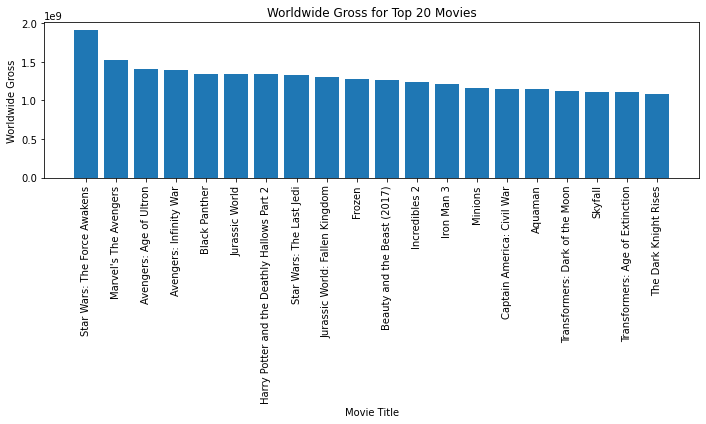

In [2905]:

# Extract movie titles and worldwide gross
movie_titles = bom_df_sorted['title'].head(20)
worldwide_gross = bom_df_sorted['worldwide_gross'].head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(movie_titles, worldwide_gross)


plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross for Top 20 Movies')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [2906]:
movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5761,62,2014-12-31,Stories of Our Lives,"$15,000",$0,$0
5771,72,2015-05-19,Family Motocross,"$10,000",$0,$0
5772,73,2012-01-13,Newlyweds,"$9,000","$4,584","$4,584"
5777,78,2018-12-31,Red 11,"$7,000",$0,$0
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0


In [2907]:

# Remove the dollar sign ($) and commas from the specified columns
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('[$,]', '').astype(float)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace('[$,]', '').astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('[$,]', '').astype(float)



movie_budgets_df.info()

 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   float64       
 4   domestic_gross     2194 non-null   float64       
 5   worldwide_gross    2194 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 120.0+ KB


In [2908]:
movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.0
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.0
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4584.0
5777,78,2018-12-31,Red 11,7000.0,0.0,0.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0


In [2909]:
movie_budgets_df['foreign_gross'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['domestic_gross']

In [2910]:
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

In [2911]:
movie_budgets_sorted = movie_budgets_df.sort_values(by='net_profit', ascending=False)

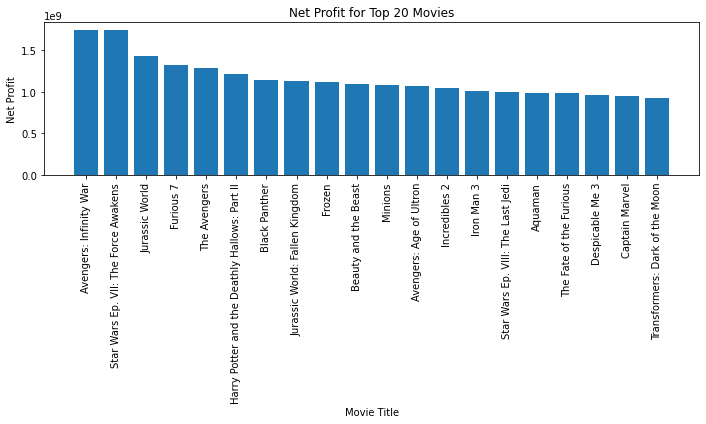

In [2912]:
# Extract movie titles and worldwide gross
movie_titles = movie_budgets_sorted['movie'].head(20)
worldwide_gross = movie_budgets_sorted['net_profit'].head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(movie_titles, worldwide_gross)


plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Net Profit')
plt.title('Net Profit for Top 20 Movies')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


We've seen the top 20 movies in both data sets now we need to determine which genre these movies belong to . Starting with the bom_df_sorted. Since this data set does not contain movie id and the movie_info_df does not have movie titles then the only way we can get their genres is by using the imdb_df data 

In [2913]:


# Merge the two dataframes based on the movie titles
merged_df = pd.merge(bom_df_sorted.head(100), imdb_df, left_on='title', right_on='primary_title', how='inner')

# Extract the genres column from the merged dataframe
top_100_genres = merged_df['genres']

# Display the count of each genre
genre_counts = top_100_genres.value_counts()
print(genre_counts)


Action,Adventure,Sci-Fi          24
Adventure,Animation,Comedy       16
Action,Adventure,Fantasy         10
Action,Adventure,Comedy           7
Action,Adventure,Animation        5
Action,Adventure,Thriller         5
Action,Crime,Thriller             3
Adventure,Fantasy                 2
Adventure,Family,Fantasy          2
Adventure,Drama,Sci-Fi            2
Adventure,Drama,Fantasy           2
Action,Adventure,Family           1
Drama,Sci-Fi,Thriller             1
Horror                            1
Drama,Romance,Thriller            1
Horror,Thriller                   1
Sci-Fi                            1
Action,Thriller                   1
Adventure,Drama,Sport             1
Biography,Drama,Music             1
Documentary,Drama,Sport           1
Comedy,Mystery                    1
Animation,Comedy,Family           1
Crime,Drama                       1
Biography,Documentary,History     1
Family                            1
Action,Adventure,Drama            1
Fantasy,Romance             

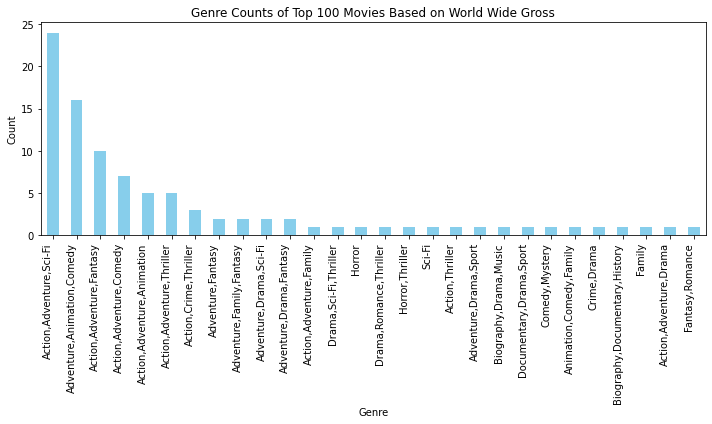

In [2914]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts of Top 100 Movies Based on World Wide Gross')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

The graph above shows which combination of genres has the most movies with the highest world wide gross. Now lets check the individual genres.

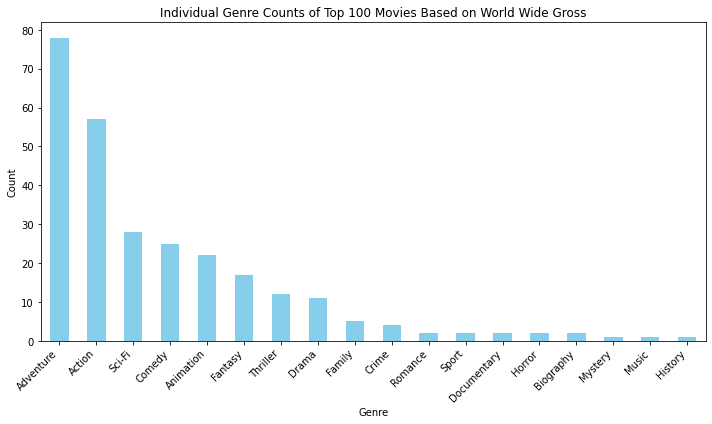

In [2915]:


# Splitting multi-genre entries and creating a list of individual genres
individual_genres = top_100_genres.str.split(',').explode()

# Counting the occurrences of each individual genre
individual_genre_counts = individual_genres.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
individual_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Individual Genre Counts of Top 100 Movies Based on World Wide Gross')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Lets see which genre has produced the most movies with the highest box office

In [2916]:
top_20_movies = movie_info_df.sort_values(by='box_office',ascending=False).head(20)

In [2917]:
top_20_movies['genre'].unique()

array(['Action and Adventure|Science Fiction and Fantasy',
       'Action and Adventure|Mystery and Suspense',
       'Action and Adventure|Drama|Mystery and Suspense',
       'Science Fiction and Fantasy', 'Comedy',
       'Action and Adventure|Animation|Kids and Family', 'Comedy|Drama',
       'Animation|Kids and Family', 'Drama|Mystery and Suspense', 'Drama',
       'Action and Adventure|Comedy|Science Fiction and Fantasy',
       'Animation|Comedy',
       'Action and Adventure|Horror|Kids and Family|Science Fiction and Fantasy',
       'Action and Adventure|Mystery and Suspense|Romance'], dtype=object)

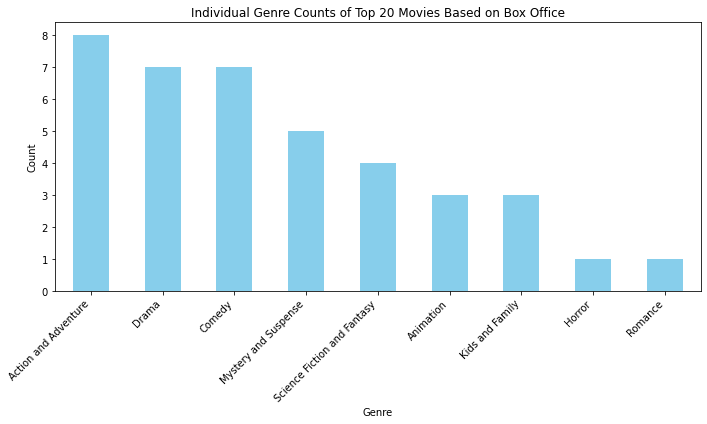

In [2918]:

# Splitting multi-genre entries and creating a list of individual genres
individual_genres = top_20_movies['genre'].str.split('|')

# Create a DataFrame with the individual genres
individual_genres_df = pd.DataFrame(individual_genres.tolist(), index=top_20_movies.index)

# Stack the DataFrame into a Series
stacked_genres = individual_genres_df.stack()

# Count the occurrences of each individual genre
genre_counts = stacked_genres.value_counts()

# Display the resulting Series with the counts of each individual genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Individual Genre Counts of Top 20 Movies Based on Box Office')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can do the same thing for movies in the movie budgets database. 

In [2919]:
Info_Budgets_df = pd.merge(movie_info_df, movie_budgets_df, on='id', how='inner')
Info_Budgets_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108 minutes,Entertainment One,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,107000000.0,-200237650.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108 minutes,Entertainment One,2018-11-21,Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,323191984.0,349283695.0
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108 minutes,Entertainment One,2018-10-05,Venom,116000000.0,213511408.0,853628605.0,640117197.0,737628605.0
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108 minutes,Entertainment One,2015-09-18,Everest,65000000.0,43482270.0,221297061.0,177814791.0,156297061.0
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108 minutes,Entertainment One,2015-05-29,Aloha,37000000.0,21052030.0,25387091.0,4335061.0,-11612909.0


In [2920]:
Info_Budgets_df.sort_values(by='net_profit', ascending=False,inplace=True)

In [2921]:
Info_Budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 77 to 0
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 241 non-null    int64         
 1   synopsis           241 non-null    object        
 2   rating             241 non-null    object        
 3   genre              241 non-null    object        
 4   director           241 non-null    object        
 5   writer             241 non-null    object        
 6   theater_date       241 non-null    datetime64[ns]
 7   dvd_date           241 non-null    object        
 8   currency           241 non-null    object        
 9   box_office         241 non-null    int64         
 10  runtime            241 non-null    object        
 11  studio             241 non-null    object        
 12  release_date       241 non-null    datetime64[ns]
 13  movie              241 non-null    object        
 14  production_

In [2922]:


# Extract the top 50 rows
top_50 = Info_Budgets_df.head(50)

# Calculate the value counts of 'genre' in the top 50
genre_counts_top_50 = top_50['genre'].value_counts()

# Display the value counts
print(genre_counts_top_50)


Comedy|Drama                                                     8
Drama                                                            7
Drama|Sports and Fitness                                         6
Drama|Science Fiction and Fantasy                                6
Mystery and Suspense                                             5
Comedy                                                           5
Action and Adventure|Mystery and Suspense                        4
Comedy|Drama|Mystery and Suspense                                4
Action and Adventure|Drama|Science Fiction and Fantasy           4
Art House and International|Drama|Musical and Performing Arts    1
Name: genre, dtype: int64


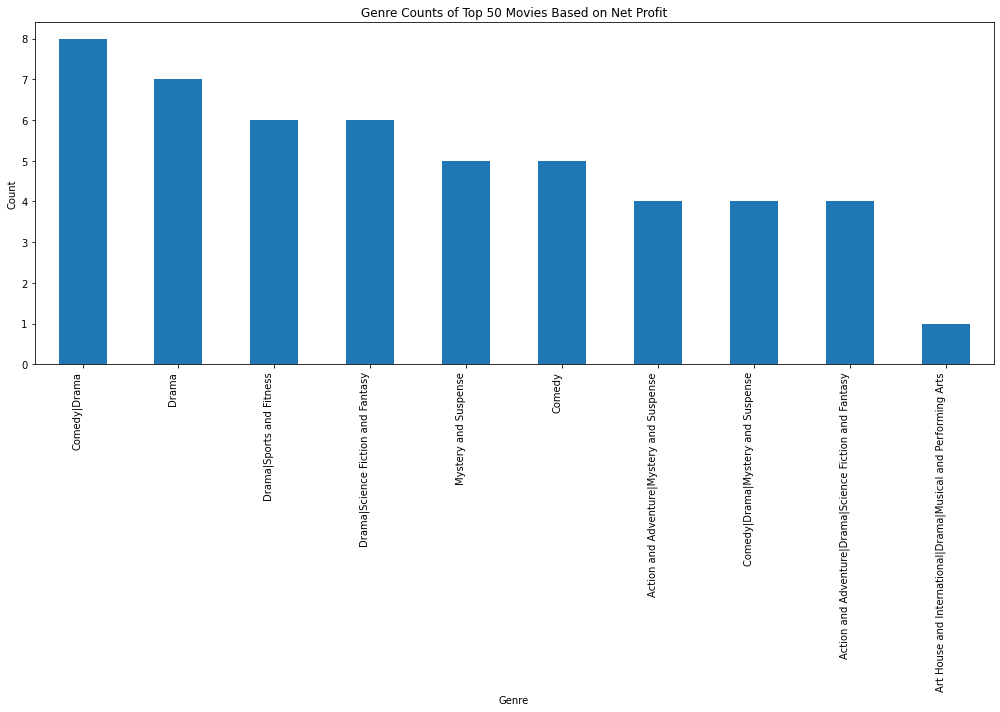

In [2923]:
plt.figure(figsize=(14, 10))
genre_counts_top_50.plot(kind='bar',)
plt.title('Genre Counts of Top 50 Movies Based on Net Profit')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

We can  clearly see that drama movies generate the greatest net profit. Now lets look at the relationship between production budget and net profit.

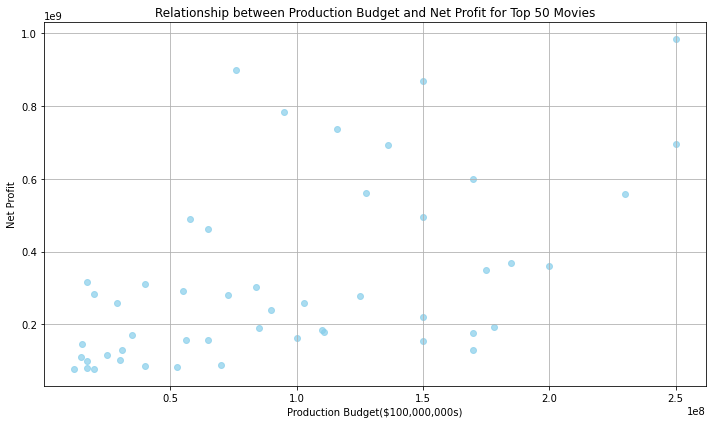

In [2924]:

# Extracting 'production_budget' and 'net_profit' columns
production_budget = top_50['production_budget']
net_profit = top_50['net_profit']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, net_profit, color='skyblue', alpha=0.7)
plt.title('Relationship between Production Budget and Net Profit for Top 50 Movies')
plt.xlabel('Production Budget($100,000,000s)')
plt.ylabel('Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


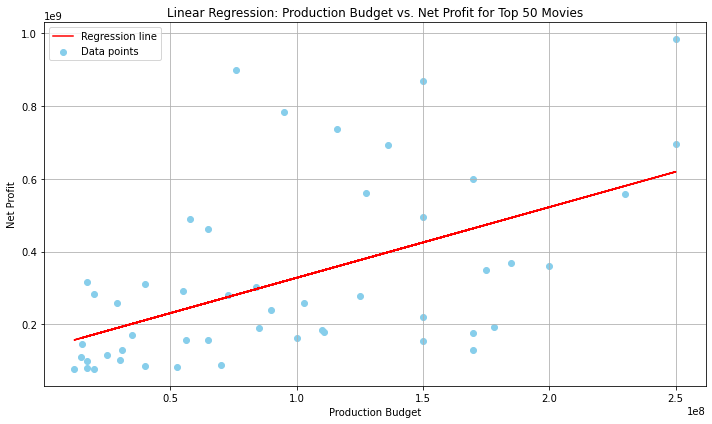

In [2925]:

from scipy.stats import linregress



# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(production_budget, net_profit)

# Create regression line
regression_line = slope * production_budget + intercept

# Plot the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, net_profit, color='skyblue', label='Data points')
plt.plot(production_budget, regression_line, color='red', label='Regression line')
plt.title('Linear Regression: Production Budget vs. Net Profit for Top 50 Movies')
plt.xlabel('Production Budget')
plt.ylabel('Net Profit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the above scatter plot we can see that there is a low positive relationship between an increase in production budget and an increase in the net profit for a movie

B) Popularity and genre 

In [2926]:
popularity_genres_df = pd.merge(imdb_df,tmdb_df,on='original_title',how='inner')

In [2927]:
most_popular_movies = popularity_genres_df.sort_values(by='popularity',ascending=False).head(1000)

In [2928]:
most_popular_movies['genres'].unique()

array(['Action,Adventure,Sci-Fi', 'Action,Crime,Thriller',
       'Action,Adventure,Animation', 'Adventure,Fantasy',
       'Action,Adventure,Comedy', 'Drama,Mystery,Sci-Fi',
       'Adventure,Family,Fantasy', 'Adventure,Animation,Comedy',
       'Comedy,Drama,Family', 'Action,Drama,Sci-Fi', 'Thriller',
       'Action,Sci-Fi,Thriller', 'Action,Adventure,Fantasy',
       'Action,Adventure,Drama', 'Action,Adventure,Thriller',
       'Action,Drama', 'N/A', 'Biography,Drama,Music',
       'Action,Mystery,Sci-Fi', 'Biography,Comedy,Drama',
       'Drama,Music,Romance', 'Comedy,Crime,Drama', 'Crime,Drama,Mystery',
       'Crime,Drama,Thriller', 'Adventure,Fantasy,Mystery',
       'Biography,Drama,Thriller', 'Biography,Drama',
       'Action,Crime,Drama', 'Comedy,Mystery', 'Family,Fantasy,Musical',
       'Documentary,Drama,Sport', 'Sci-Fi', 'Drama,Romance',
       'Action,Horror,Sci-Fi', 'Horror,Mystery,Thriller',
       'Drama,Mystery,Thriller', 'Comedy,Family,Fantasy',
       'Action,Thril

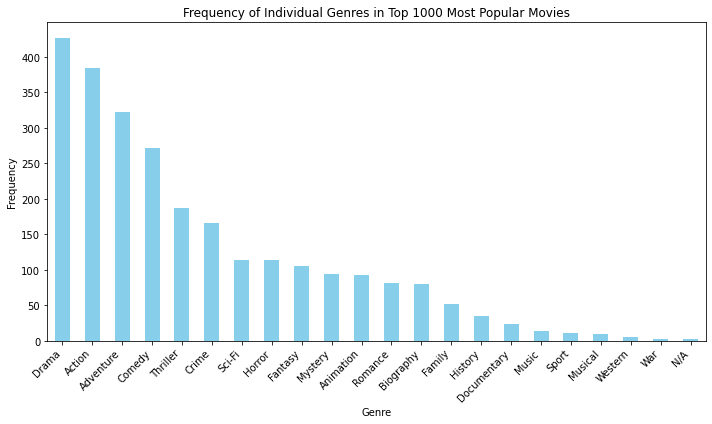

In [2929]:

# Splitting multi-genre entries and creating a list of individual genres
individual_genres = most_popular_movies['genres'].str.split(',').explode()

# Counting the occurrences of each individual genre
genre_counts = individual_genres.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Individual Genres in Top 1000 Most Popular Movies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C) Relationship between production budget and profit

In [2933]:
high_production = movie_budgets_df.sort_values(by='production_budget',ascending=False).head(100)
low_production = movie_budgets_df.sort_values(by='production_budget').head(100)


In [2944]:
print(high_production['production_budget'].min())
print(low_production['production_budget'].max())

165000000.0
290000.0


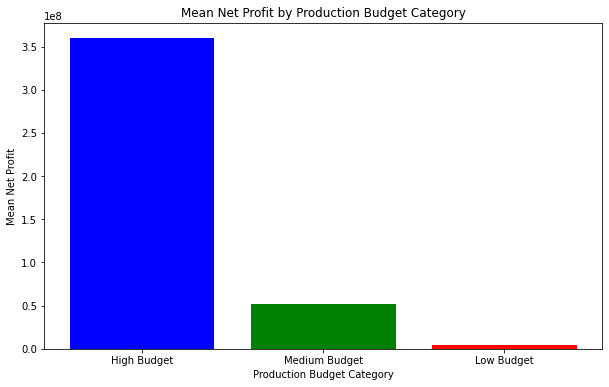

In [2946]:

# Filter movies with production budgets of 100 million and above
high_budget_movies = movie_budgets_df[movie_budgets_df['production_budget'] >= 100000000]

# Filter movies with production budgets between 10 million and 100 million
medium_budget_movies = movie_budgets_df[(movie_budgets_df['production_budget'] >= 10000000) & 
                                        (movie_budgets_df['production_budget'] < 100000000)]

# Filter movies with production budgets less than 10 million
low_budget_movies = movie_budgets_df[movie_budgets_df['production_budget'] < 10000000]

# Randomly sample 100 movies from each subset
sample_high_budget = high_budget_movies.sample(n=100, random_state=42)
sample_medium_budget = medium_budget_movies.sample(n=100, random_state=42)
sample_low_budget = low_budget_movies.sample(n=100, random_state=42)

# Calculate the mean net profit for each category
mean_net_profit_high = sample_high_budget['net_profit'].mean()
mean_net_profit_medium = sample_medium_budget['net_profit'].mean()
mean_net_profit_low = sample_low_budget['net_profit'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(['High Budget', 'Medium Budget', 'Low Budget'], 
        [mean_net_profit_high, mean_net_profit_medium, mean_net_profit_low],
        color=['blue', 'green', 'red'])
plt.title('Mean Net Profit by Production Budget Category')
plt.xlabel('Production Budget Category')
plt.ylabel('Mean Net Profit')
plt.show()